### Introduction

#### Predicting the working hours per week at different locations. The prediction is based on various attributes such as education, marital status, and so on.

In [2]:
!pip install -U klib

     |████████████████████████████████| 23.1 MB 5.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


### Import the necessary packages.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
import klib # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import train and test dataset

In [5]:
train=pd.read_csv("/content/gdrive/MyDrive/MachineHack-work_hour_prediction_challenge/train.csv")
test=pd.read_csv("/content/gdrive/MyDrive/MachineHack-work_hour_prediction_challenge/test.csv")

### Structure of the train and test dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18944 non-null  int64 
 1   workclass       18944 non-null  object
 2   fnlwgt          18944 non-null  int64 
 3   education       18944 non-null  object
 4   education-num   18944 non-null  int64 
 5   marital-status  18944 non-null  object
 6   occupation      18944 non-null  object
 7   relationship    18944 non-null  object
 8   race            18944 non-null  object
 9   sex             18944 non-null  object
 10  capital-gain    18944 non-null  int64 
 11  capital-loss    18944 non-null  int64 
 12  hours-per-week  18944 non-null  int64 
 13  native-country  18944 non-null  object
 14  income          18944 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.2+ MB


#### The above information shows that there are 18944 data entries and 15 columns.

#### The target column is **hours-per-week**.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8119 non-null   int64  
 1   workclass       8119 non-null   object 
 2   fnlwgt          8119 non-null   int64  
 3   education       8119 non-null   object 
 4   education-num   8119 non-null   int64  
 5   marital-status  8119 non-null   object 
 6   occupation      8119 non-null   object 
 7   relationship    8119 non-null   object 
 8   race            8119 non-null   object 
 9   sex             8119 non-null   object 
 10  capital-gain    8119 non-null   int64  
 11  capital-loss    8119 non-null   int64  
 12  native-country  8119 non-null   object 
 13  income          8119 non-null   object 
 14  hours-per-week  0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 951.6+ KB


#### The above information shows that there are 8119 data entries and 15 columns.

#### Let's see is there any missing values in train and test dataset by column wise.

In [ ]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### The above information shows that there are no missing values.

In [ ]:
test.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
native-country       0
income               0
hours-per-week    8119
dtype: int64

### The above information shows that there are no missing values.

#### Let's see the glimpse of train dataset

In [ ]:
train.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Private,98926,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,-3,0,44,United-States,<=50K
1,76,Self-emp-not-inc,132607,Bachelors,12,Married-civ-spouse,Sales,Husband,White,Male,7527,0,44,United-States,>50K
2,40,Private,243258,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,19,0,57,United-States,>50K


### Let's explore and visualize each column of the train dataset. First,let's see the target column(**hours-per-week**) distribution.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


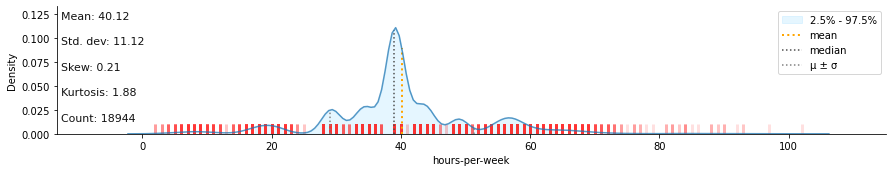

In [ ]:
_=klib.dist_plot(train['hours-per-week'])


### Let's create a fuction to display a boxplot.

In [ ]:
def box_plot(df,col,title=''):
    _=plt.figure(figsize=(10,8))
    _=sns.boxplot(y=df[col])
    _=plt.title(title,fontsize=25)
    _=plt.ylabel(col,fontsize=20)
    _=plt.yticks(fontsize=14)

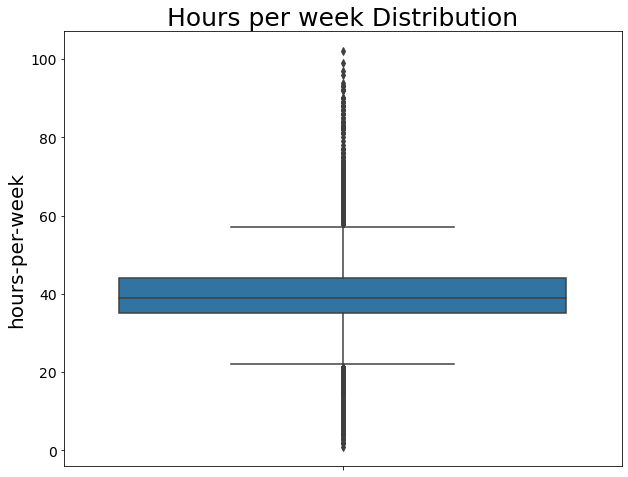

In [ ]:
box_plot(train,'hours-per-week','Hours per week Distribution')

In [ ]:
train['hours-per-week'].describe()

count    18944.000000
mean        40.119299
std         11.124649
min          1.000000
25%         35.000000
50%         39.000000
75%         44.000000
max        102.000000
Name: hours-per-week, dtype: float64

#### The above histogram explains that the hours-per-week column is normally distributed.

#### The hours-per-week range from 1 to 102.

#### The average number of hours per week is 40.

#### The boxplot explains that there are outliers above the third quartile and below the first quartile.


### Let's see age column distribtuion.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


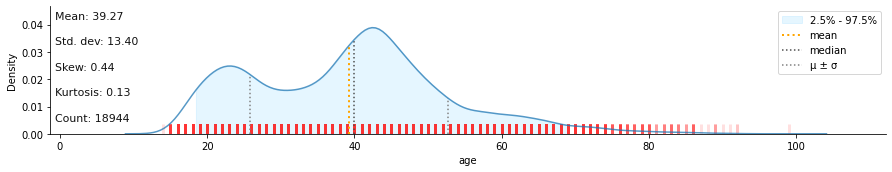

In [ ]:
_=klib.dist_plot(train['age'])

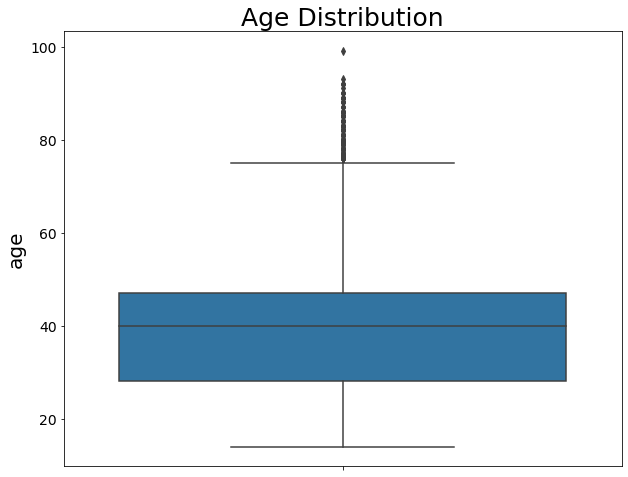

In [ ]:
box_plot(train,'age','Age Distribution')

In [ ]:
train['age'].describe()

count    18944.000000
mean        39.266470
std         13.395878
min         14.000000
25%         28.000000
50%         40.000000
75%         47.000000
max         99.000000
Name: age, dtype: float64

#### The above histogram explains that the age column is normally distributed.

#### The age ranges from 14 to 99.

#### The average age is 39.

#### The boxplot explains that there are outliers above the third quartile.


### Let's see how work hours per week changes over age.

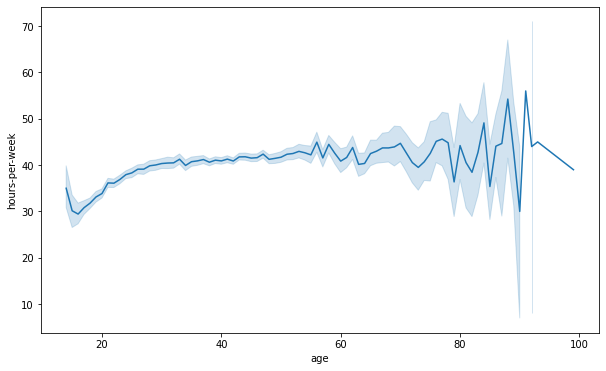

In [ ]:
_=plt.figure(figsize=(10,6))
_=sns.lineplot(x=train['age'],y=train['hours-per-week'])

#### The above line plot explains that after the age of 50 work hours per week fluctuate.

### Let's see different work class types and their work hours per week.

### Let's create a fuction to display categorcial level count.

In [ ]:
def cat_plot(df,catcol,title=''):
  plt.figure(figsize=(15,6))
  _=sns.countplot(df[catcol],order=df[catcol].value_counts().index)
  _=plt.title(title,fontsize=25)
  _=plt.xlabel(catcol,fontsize=20)
  _=plt.xticks(fontsize=14, rotation=60)

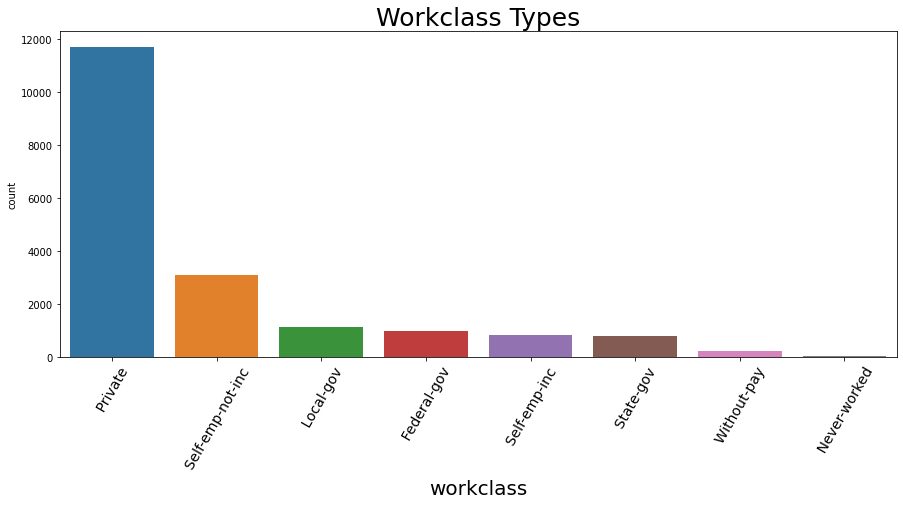

In [ ]:
cat_plot(train,'workclass','Workclass Types')

In [ ]:
train['workclass'].value_counts()

 Private             11700
 Self-emp-not-inc     3089
 Local-gov            1159
 Federal-gov           995
 Self-emp-inc          861
 State-gov             819
 Without-pay           258
 Never-worked           63
Name: workclass, dtype: int64

#### The above bar plot explains that the private work-class type count is high.

### Let's see how work hours per week changes on different work-class.

### Let's create a fuction to display category-wise boxplot.

In [ ]:
def cat_wise_box(df,groupcol,value):
    _=plt.figure(figsize=(20,10))
    _=sns.boxplot(x=df[groupcol],y=df[value])
    _=plt.xlabel(groupcol,fontsize=20)
    _=plt.ylabel(value,fontsize=20)
    _=plt.xticks(fontsize=18, rotation=60)

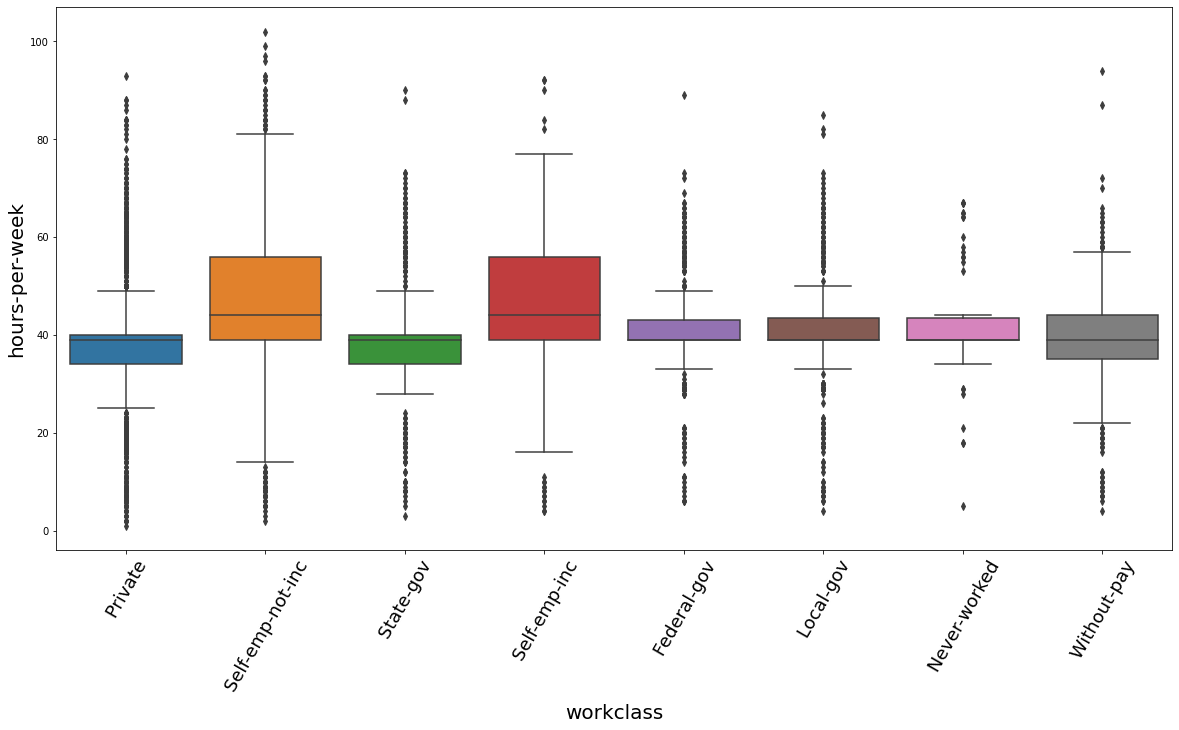

In [ ]:
cat_wise_box(train,'workclass','hours-per-week')

### Let's create a fuction to display group by column numerical summary.

In [ ]:
def group_summary(df,groupcol,value):
    return df.groupby(groupcol)[value].describe().reset_index().sort_values('mean',ascending=False)

In [ ]:
group_summary(train,'workclass','hours-per-week')

,workclass,count,mean,std,min,25%,50%,75%,max
4,Self-emp-inc,861.0,46.083624,12.400768,4.0,39.0,44.0,56.0,92.0
5,Self-emp-not-inc,3089.0,45.182907,13.953170,2.0,39.0,44.0,56.0,102.0
2,Never-worked,63.0,41.761905,12.423591,5.0,39.0,39.0,43.5,67.0
1,Local-gov,1159.0,40.437446,9.438978,4.0,39.0,39.0,43.5,85.0
0,Federal-gov,995.0,40.289447,9.243228,6.0,39.0,39.0,43.0,89.0
7,Without-pay,258.0,39.593023,13.612804,4.0,35.0,39.0,44.0,94.0
6,State-gov,819.0,39.225885,11.001512,3.0,34.0,39.0,40.0,90.0
3,Private,11700.0,38.362821,9.782771,1.0,34.0,39.0,40.0,93.0


#### The above boxplot explains that the private and state-gov work-class employee's work hours per week mostly fall under 40 hours.

#### Self-employed work-class employees work hours per week mostly above 45 hours.

### Let's see work class types and their age distribution.

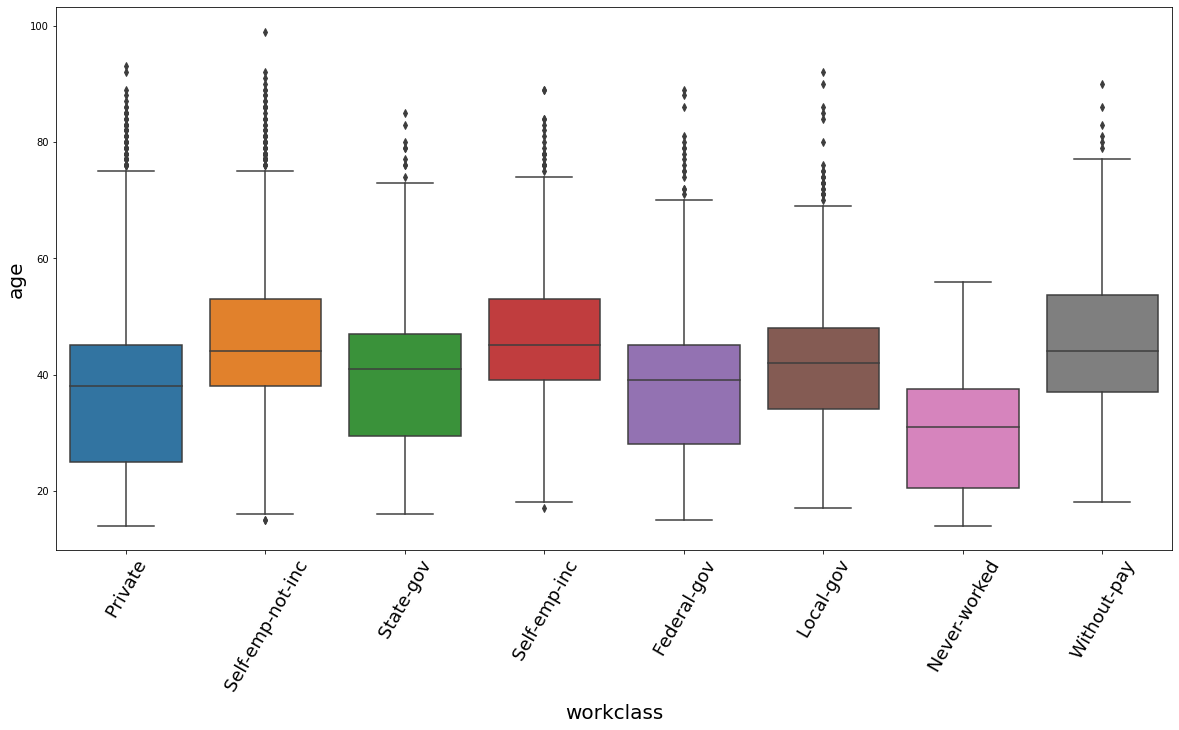

In [ ]:
cat_wise_box(train,'workclass','age')

In [ ]:
group_summary(train,'workclass','age')

,workclass,count,mean,std,min,25%,50%,75%,max
4,Self-emp-inc,861.0,45.983740,12.968556,17.0,39.0,45.0,53.00,89.0
7,Without-pay,258.0,45.616279,15.433428,18.0,37.0,44.0,53.75,90.0
5,Self-emp-not-inc,3089.0,45.350275,13.604077,15.0,38.0,44.0,53.00,99.0
1,Local-gov,1159.0,41.601381,11.765624,17.0,34.0,42.0,48.00,92.0
6,State-gov,819.0,39.782662,12.860038,16.0,29.5,41.0,47.00,85.0
0,Federal-gov,995.0,37.865327,12.182299,15.0,28.0,39.0,45.00,89.0
3,Private,11700.0,36.925983,12.845202,14.0,25.0,38.0,45.00,93.0
2,Never-worked,63.0,30.285714,10.841123,14.0,20.5,31.0,37.50,56.0


#### The above boxplot explains that 75% of the government employees are under the age group of 50.

### Let's see number of people in each work-class.

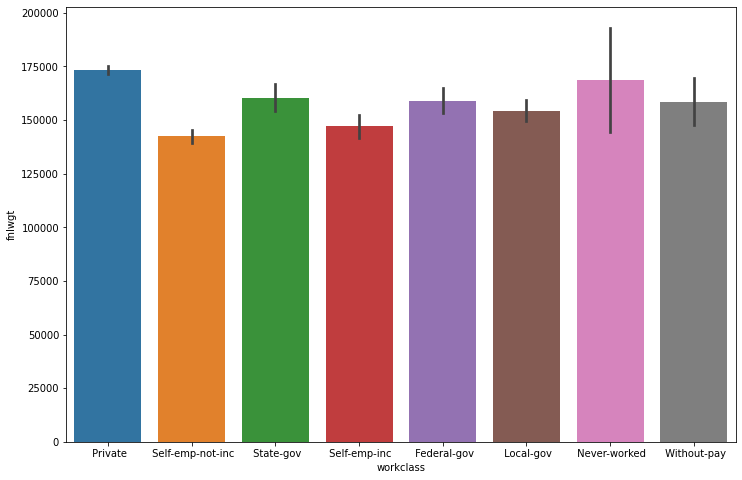

In [ ]:
_=plt.figure(figsize=(12,8))
_=sns.barplot(data=train,x=train['workclass'],y=train['fnlwgt'])

In [ ]:
train.groupby('workclass')['fnlwgt'].describe()

,count,mean,std,min,25%,50%,75%,max
workclass,,,,,,,,
Federal-gov,995.0,159037.665327,94686.236876,17044.0,93409.0,146041.0,209594.50,557501.0
Local-gov,1159.0,154199.316652,87358.508094,8670.0,90980.5,138910.0,207328.00,524031.0
Never-worked,63.0,168590.761905,94510.454035,22715.0,111486.0,156374.0,212099.50,406460.0
Private,11700.0,173197.791709,95312.135613,8019.0,104917.0,163596.0,223289.00,772988.0
Self-emp-inc,861.0,147244.572590,80272.079511,14883.0,91660.0,133986.0,196934.00,559765.0
Self-emp-not-inc,3089.0,142307.430236,86439.416683,9407.0,79429.0,129886.0,192933.00,744240.0
State-gov,819.0,160072.697192,94019.655172,9144.0,95533.0,143241.0,207851.50,550940.0
Without-pay,258.0,158483.255814,89850.860469,12827.0,93911.5,145472.5,215276.75,454751.0


#### The above plot explains that the private and never-worked work-class population is higher when compared to other work-class populations.

### Let's see education qualification types.

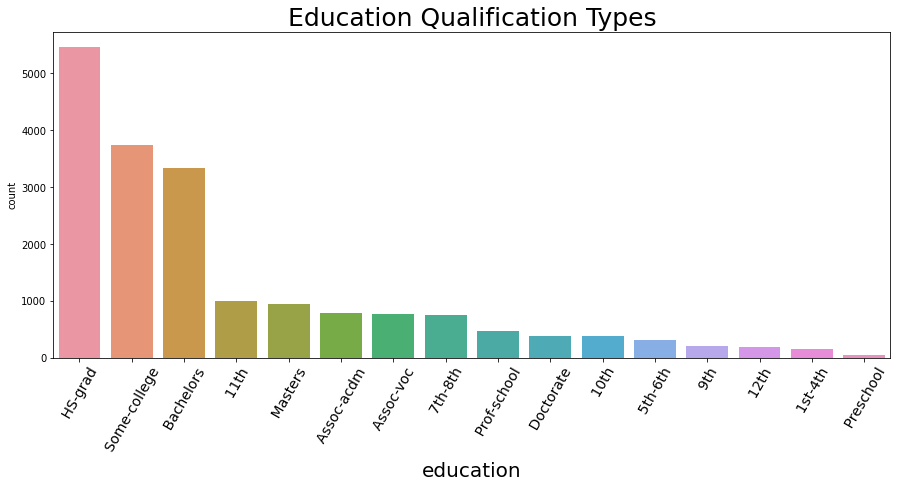

In [ ]:
cat_plot(train,'education','Education Qualification Types')

#### The above plot explains that most of the employees education qualification is high school. 

### Let's see how work hour per week changes on different education qualification.

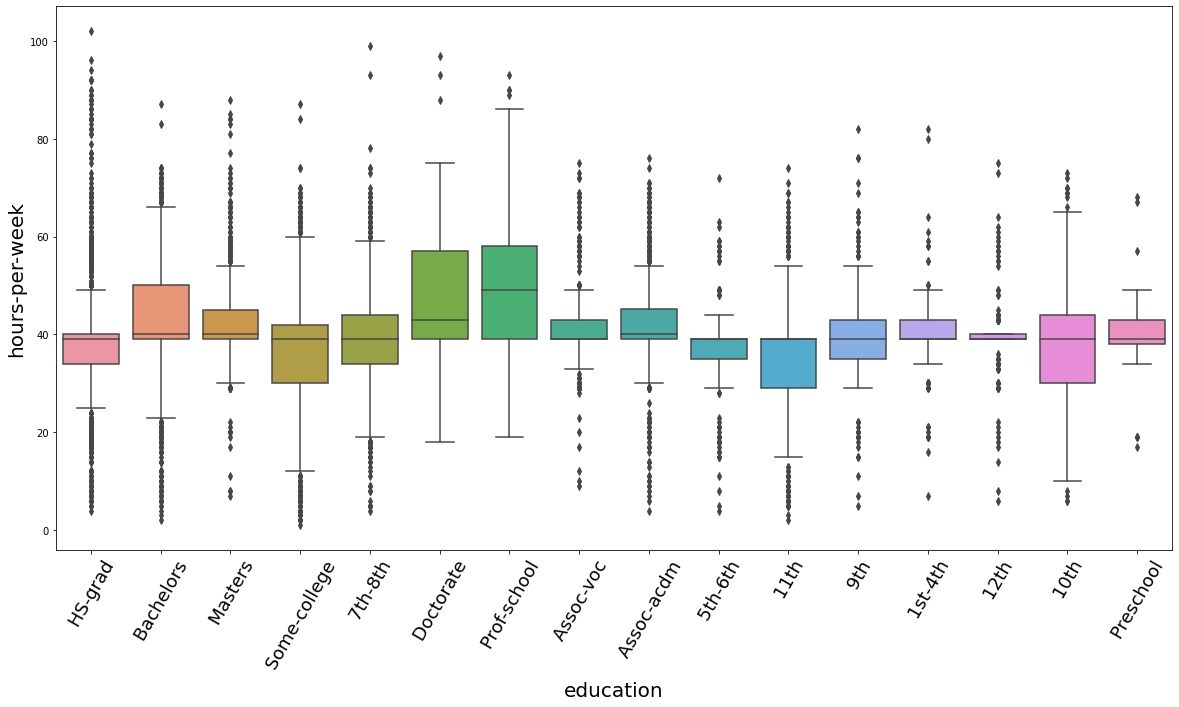

In [ ]:
cat_wise_box(train,'education','hours-per-week')

In [ ]:
group_summary(train,'education','hours-per-week')

,education,count,mean,std,min,25%,50%,75%,max
14,Prof-school,476.0,49.945378,11.567157,19.0,39.0,49.0,58.00,93.0
10,Doctorate,387.0,47.031008,11.833651,18.0,39.0,43.0,57.00,97.0
9,Bachelors,3337.0,43.956248,11.338185,2.0,39.0,40.0,50.00,87.0
12,Masters,941.0,43.543039,9.519829,7.0,39.0,40.0,45.00,88.0
7,Assoc-acdm,796.0,42.640704,10.725579,4.0,39.0,40.0,45.25,76.0
8,Assoc-voc,769.0,40.431730,6.867483,9.0,39.0,39.0,43.00,75.0
13,Preschool,44.0,39.977273,10.128221,17.0,38.0,39.0,43.00,68.0
2,12th,184.0,39.576087,8.986005,6.0,39.0,39.0,40.00,75.0
6,9th,200.0,39.575000,11.428800,5.0,35.0,39.0,43.00,82.0
3,1st-4th,148.0,39.472973,9.363735,7.0,39.0,39.0,43.00,82.0


#### The above boxplot explains that the doctorate, prof-school, preschool education qualification employees minimum work hour of per week is above 16 hours.

### Let's see marital status types and how work hours per week change based on marital status.

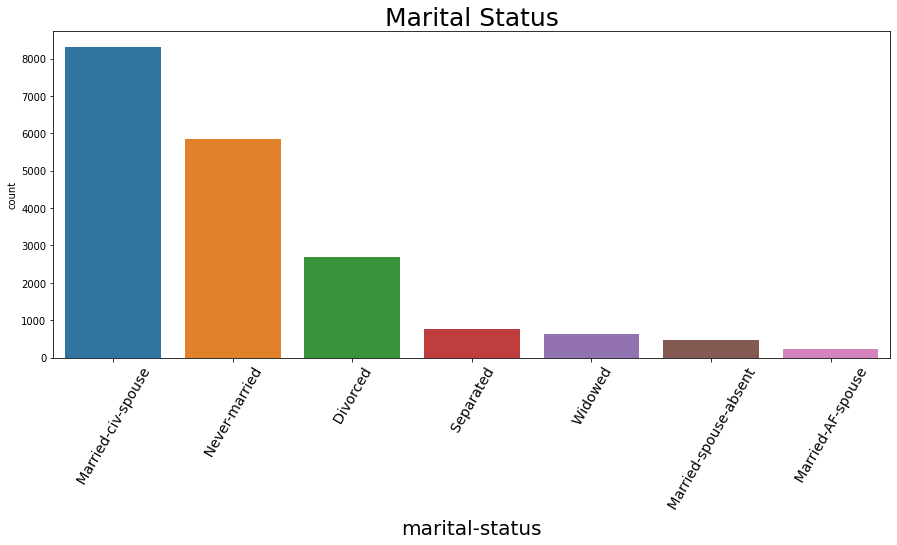

In [ ]:
cat_plot(train,'marital-status','Marital Status')

#### The above barplot explains that most of the employees married to a civilian spouse.

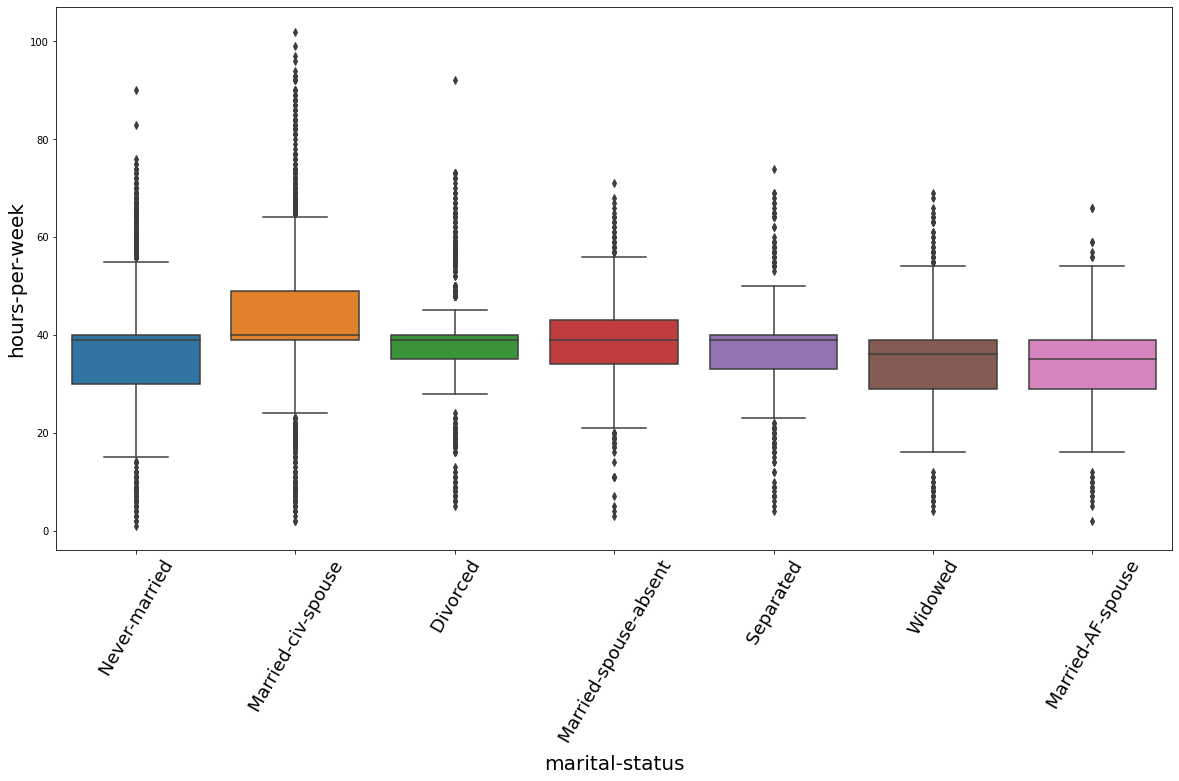

In [ ]:
cat_wise_box(train,'marital-status','hours-per-week')

In [ ]:
group_summary(train,'marital-status','hours-per-week')

,marital-status,count,mean,std,min,25%,50%,75%,max
2,Married-civ-spouse,8311.0,43.229936,11.224059,2.0,39.0,40.0,49.0,102.0
3,Married-spouse-absent,461.0,39.041215,10.470685,3.0,34.0,39.0,43.0,71.0
0,Divorced,2697.0,38.838339,8.915352,5.0,35.0,39.0,40.0,92.0
4,Never-married,5857.0,37.618747,11.002279,1.0,30.0,39.0,40.0,90.0
5,Separated,772.0,37.015544,9.557920,4.0,33.0,39.0,40.0,74.0
6,Widowed,624.0,34.801282,10.559725,4.0,29.0,36.0,39.0,69.0
1,Married-AF-spouse,222.0,33.180180,10.885416,2.0,29.0,35.0,39.0,66.0


#### The above boxplot explains that the average work hours per week for the employee who are married to civilian spouse is higher than 42 hours.

### Let's see various occupation types.

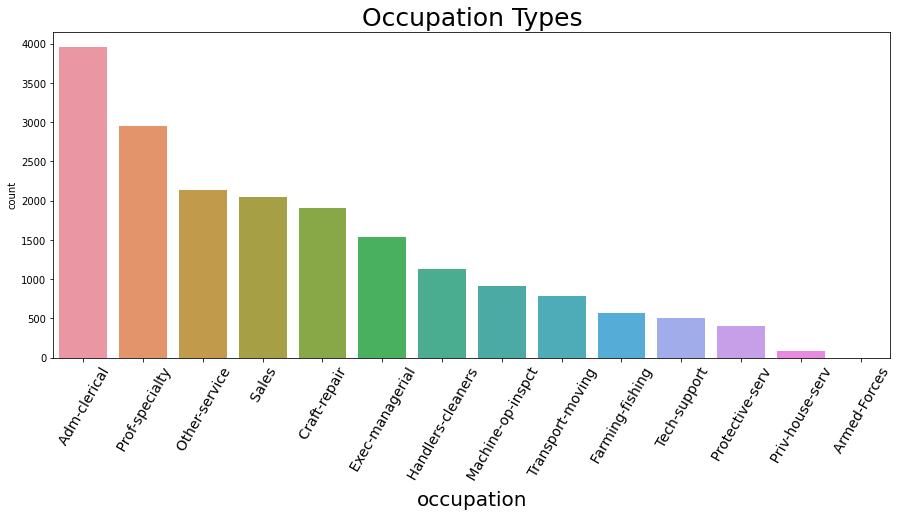

In [ ]:
cat_plot(train,'occupation','Occupation Types')

#### The above bar plot explains that the most of the employees occupation is administrative clerical job.

### Let's see how work hours per week changes on different occupations.

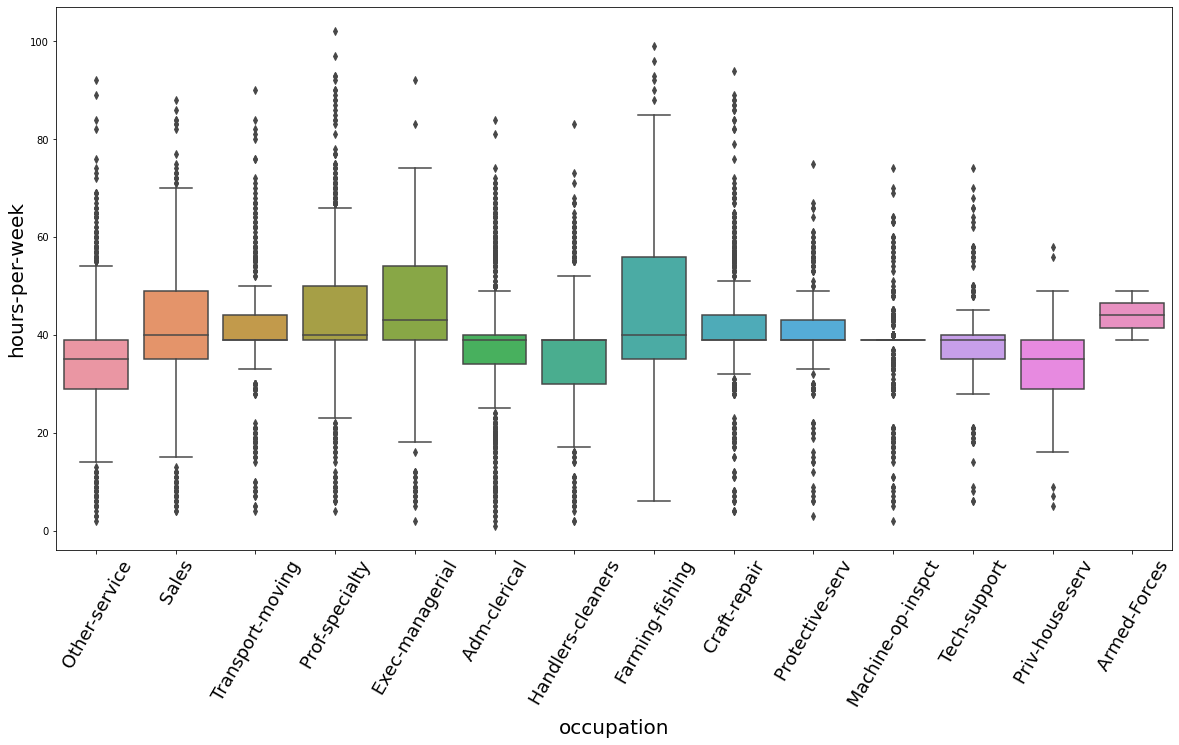

In [ ]:
cat_wise_box(train,'occupation','hours-per-week')

In [ ]:
group_summary(train,'occupation','hours-per-week')

,occupation,count,mean,std,min,25%,50%,75%,max
9,Prof-specialty,2951.0,44.546594,11.292676,4.0,39.0,40.0,50.0,102.0
3,Exec-managerial,1543.0,44.430331,10.821817,2.0,39.0,43.0,54.0,92.0
1,Armed-Forces,2.0,44.000000,7.071068,39.0,41.5,44.0,46.5,49.0
4,Farming-fishing,574.0,43.890244,15.468489,6.0,35.0,40.0,56.0,99.0
2,Craft-repair,1901.0,41.743819,9.310499,4.0,39.0,39.0,44.0,94.0
11,Sales,2046.0,41.683284,12.605598,4.0,35.0,40.0,49.0,88.0
13,Transport-moving,790.0,41.029114,11.092898,4.0,39.0,39.0,44.0,90.0
10,Protective-serv,405.0,40.340741,9.805911,3.0,39.0,39.0,43.0,75.0
12,Tech-support,504.0,38.460317,7.937781,6.0,35.0,39.0,40.0,74.0
6,Machine-op-inspct,920.0,37.833696,7.695338,2.0,39.0,39.0,39.0,74.0


#### The above boxplot explains that the employees who are in the armed forces and their maximum work hours per week are 49 hours.

### Let's see relationship types.

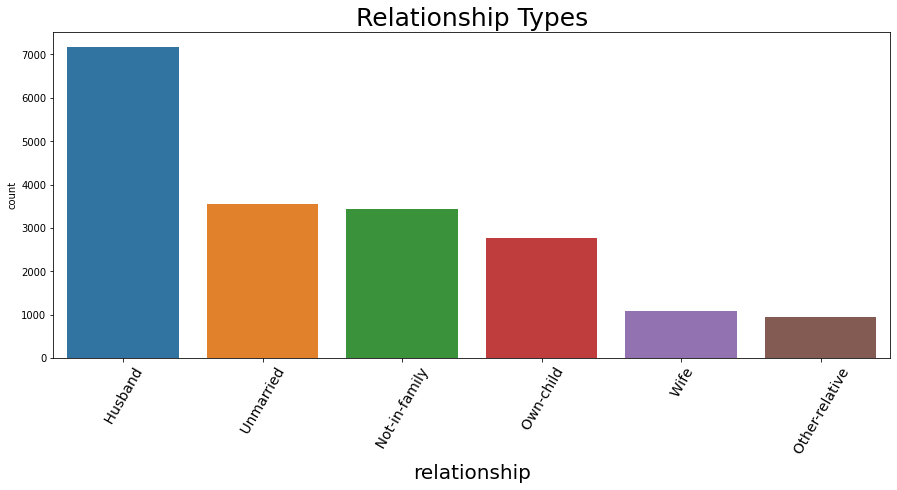

In [ ]:
cat_plot(train,'relationship','Relationship Types')

#### Let's see how work hour per week changes on different relationship types.

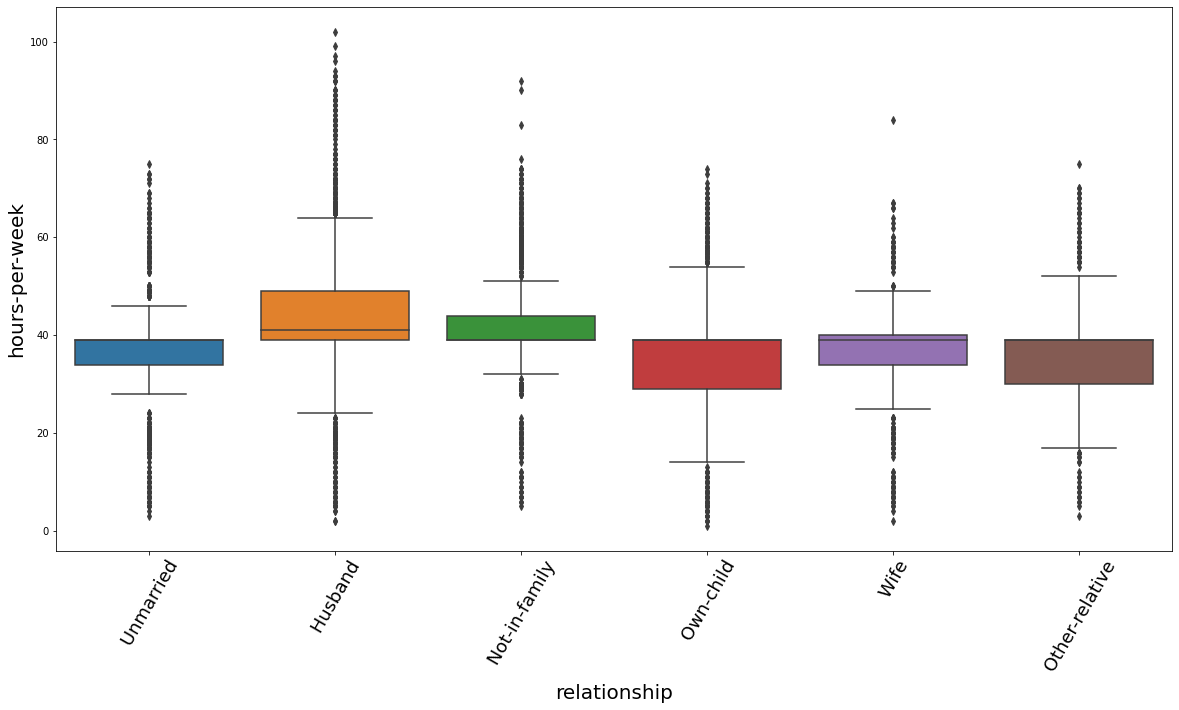

In [ ]:
cat_wise_box(train,'relationship','hours-per-week')
                

In [ ]:
group_summary(train,'relationship','hours-per-week')

,relationship,count,mean,std,min,25%,50%,75%,max
0,Husband,7164.0,44.296343,11.059267,2.0,39.0,41.0,49.0,102.0
1,Not-in-family,3428.0,41.455951,10.057906,5.0,39.0,39.0,44.0,92.0
4,Unmarried,3557.0,36.593197,8.792738,3.0,34.0,39.0,39.0,75.0
2,Other-relative,937.0,36.546425,9.688979,3.0,30.0,39.0,39.0,75.0
5,Wife,1090.0,35.925688,10.235832,2.0,34.0,39.0,40.0,84.0
3,Own-child,2768.0,35.045159,11.515853,1.0,29.0,39.0,39.0,74.0


#### The above boxplot explains that the employees who are in a husband relationship and their average work hours per week are more than 43 hours.

### Let's see employees race types.

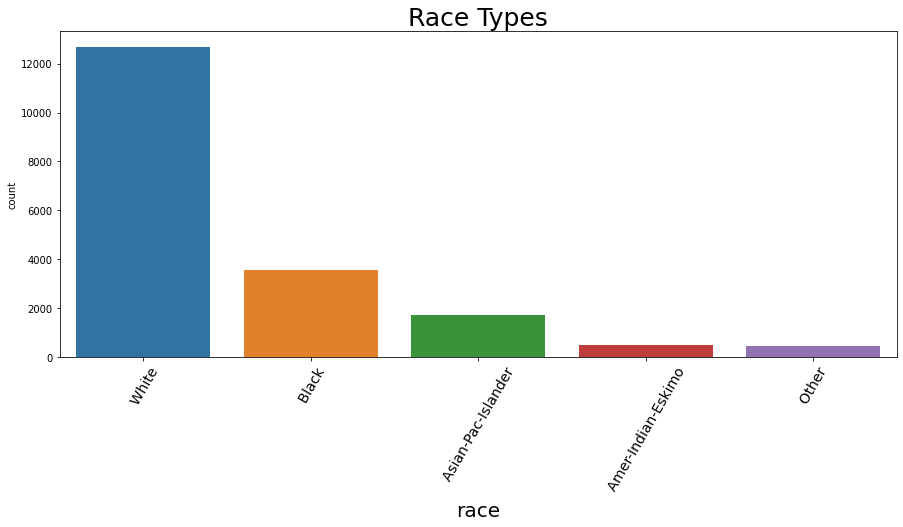

In [ ]:
cat_plot(train,'race',"Race Types")

### Let's see how work hour per week changes on different race type of employees.

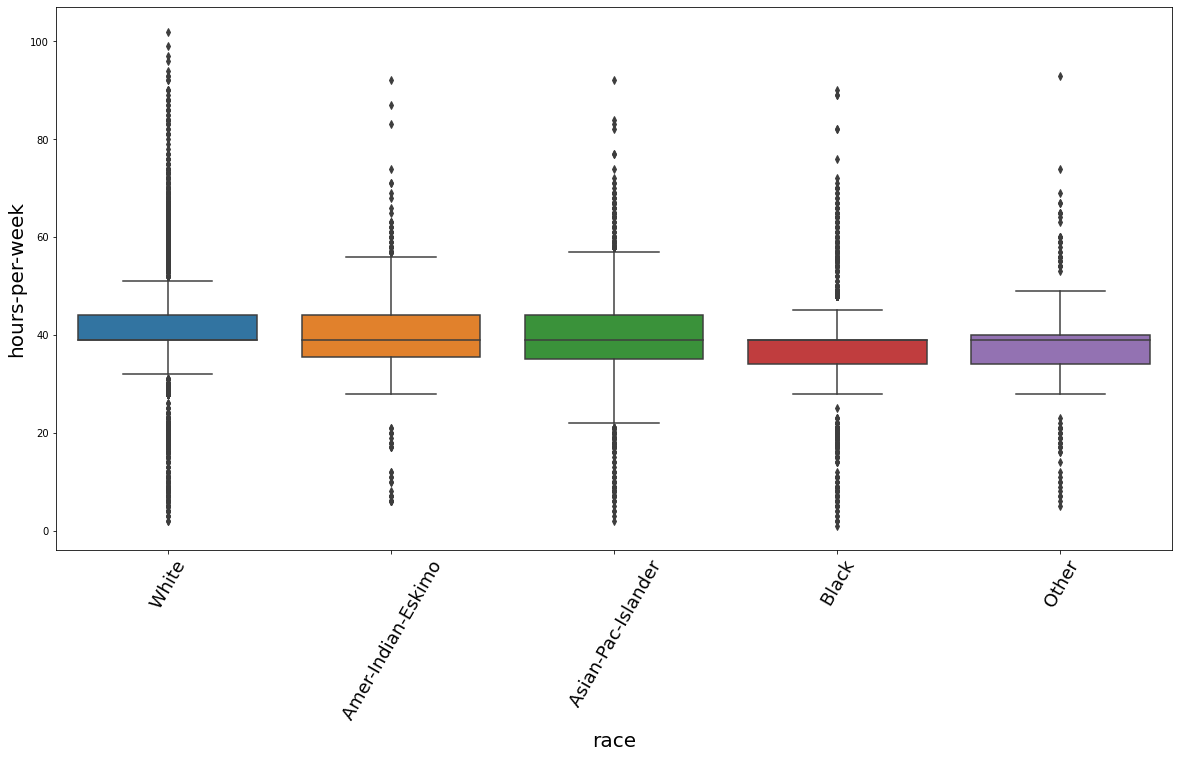

In [ ]:
cat_wise_box(train,'race','hours-per-week')

In [ ]:
group_summary(train,'race','hours-per-week')

,race,count,mean,std,min,25%,50%,75%,max
4,White,12682.0,41.069942,11.406121,2.0,39.0,39.0,44.0,102.0
0,Amer-Indian-Eskimo,491.0,40.470468,11.474045,6.0,35.5,39.0,44.0,92.0
1,Asian-Pac-Islander,1728.0,39.932870,11.831773,2.0,35.0,39.0,44.0,92.0
3,Other,478.0,37.813808,10.053570,5.0,34.0,39.0,40.0,93.0
2,Black,3565.0,37.088640,9.070091,1.0,34.0,39.0,39.0,90.0


#### The above plot explains that the white, Amer-Indian-Eskimo, Asian-Pac-Islander race employees average work hour per week is higher than the other race employees. 

### Let's see employees gender distribution.

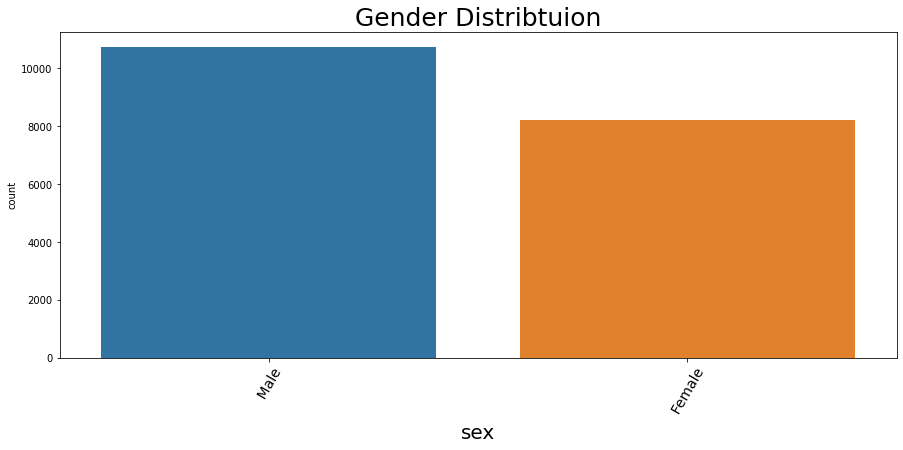

In [ ]:
cat_plot(train,'sex','Gender Distribtuion')

#### The above plot explains that the higher number of male employees. 

### Let's see is there differences between gender and work hours.

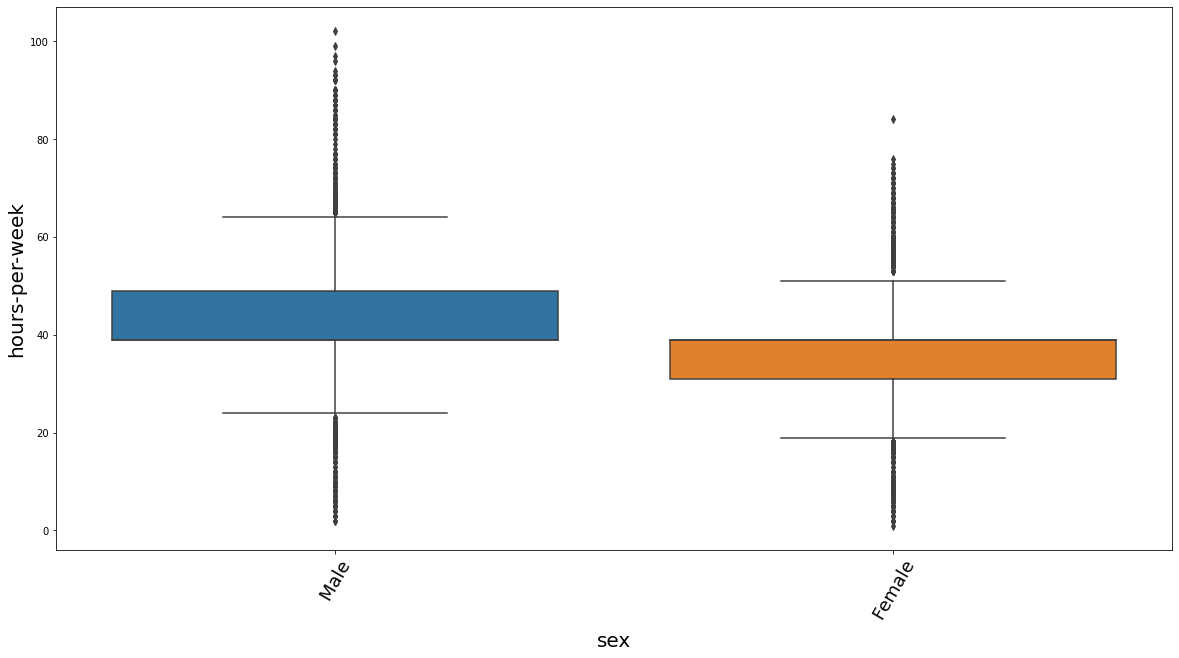

In [ ]:
cat_wise_box(train,'sex','hours-per-week')

In [ ]:
group_summary(train,'sex','hours-per-week')

,sex,count,mean,std,min,25%,50%,75%,max
1,Male,10727.0,43.036170,11.339571,2.0,39.0,39.0,49.0,102.0
0,Female,8217.0,36.311428,9.584351,1.0,31.0,39.0,39.0,84.0


#### The above boxplot explains that female employees average work hour per week is 36 hours.

### Let's see capital gain distribution.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


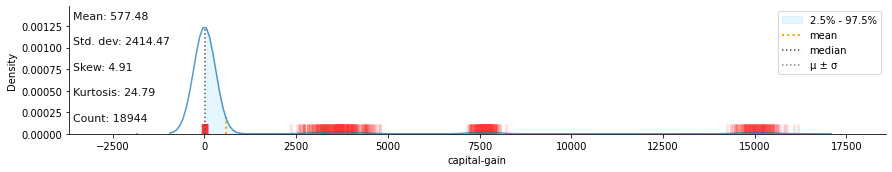

In [ ]:
klib.dist_plot(train['capital-gain'])

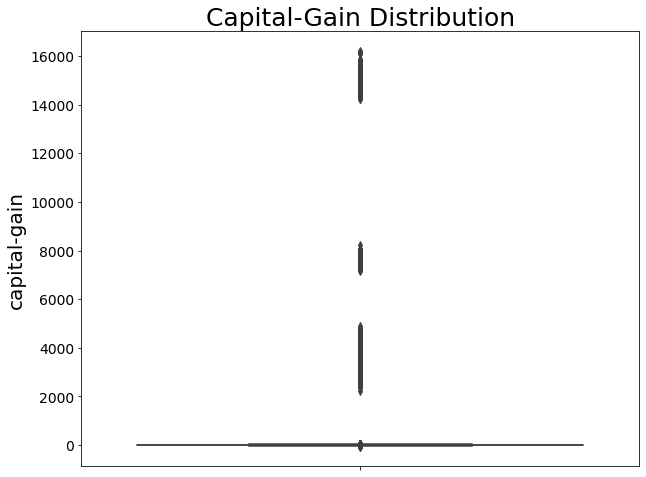

In [ ]:
box_plot(train,'capital-gain',"Capital-Gain Distribution")

In [ ]:
train['capital-gain'].describe()

count    18944.000000
mean       577.476510
std       2414.473217
min        -58.000000
25%         -5.000000
50%          5.000000
75%         17.000000
max      16193.000000
Name: capital-gain, dtype: float64

#### The above distribution plot explains that the capital-gain distribution is highly right-skewed.

#### The average capital gain is 577.

#### There are outliers above the third quartile and below the first quartile.

### Let's see how hours per week changes based on capital-gain.

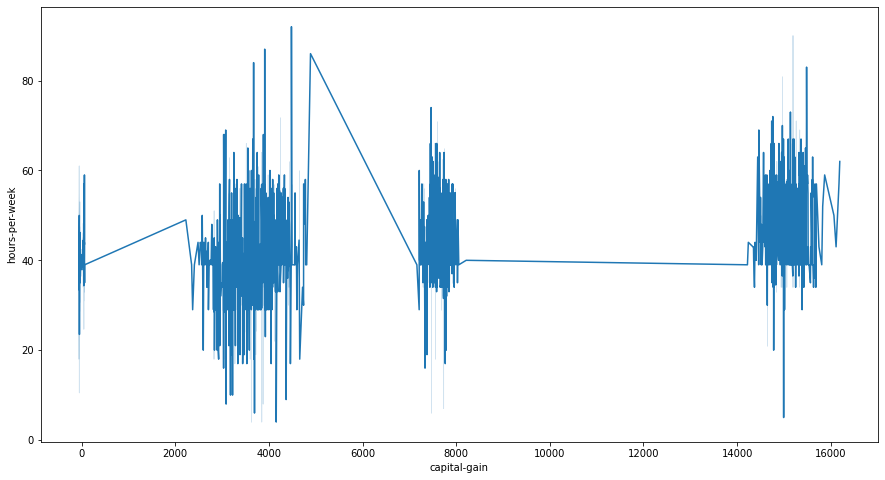

In [ ]:
_=plt.figure(figsize=(15,8))
sns.lineplot(x=train['capital-gain'],y=train['hours-per-week'])

#### The above line plot explains that from capital gain 8000 to 14000 the employee work hours per week remain constant for 40 hours.

### Let's see capital loss distribution.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


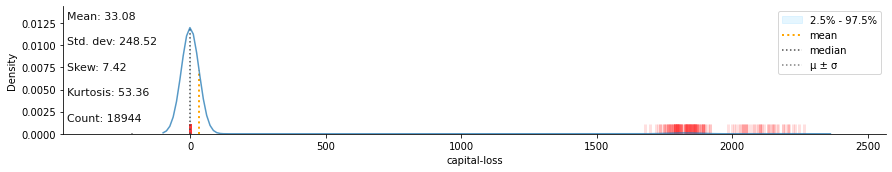

In [ ]:
klib.dist_plot(train['capital-loss'])

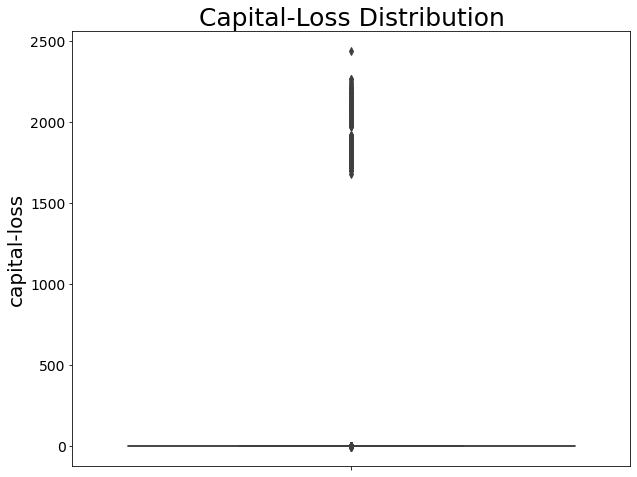

In [ ]:
box_plot(train,'capital-loss',"Capital-Loss Distribution")

In [ ]:
train['capital-loss'].describe()

count    18944.000000
mean        33.082823
std        248.521486
min         -2.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2437.000000
Name: capital-loss, dtype: float64

#### The above distribution plot explains that the capital-loss distribution is highly right-skewed.

#### The average capital loss is 33.

#### There are outliers above the third quartile and below the first quartile.

### Let's see how hours per week changes based on capital-loss.

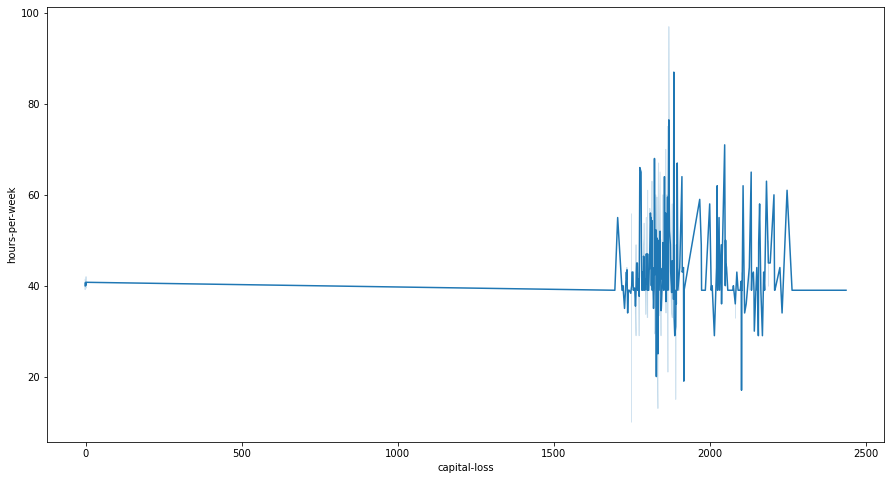

In [ ]:
_=plt.figure(figsize=(15,8))
sns.lineplot(x=train['capital-loss'],y=train['hours-per-week'])

#### The above line plot explains that from capital loss 0 to 1500 the employee work hours per week remain constant for 40 hours.

### Let's see is there relationship between capital-gain and capital-loss.

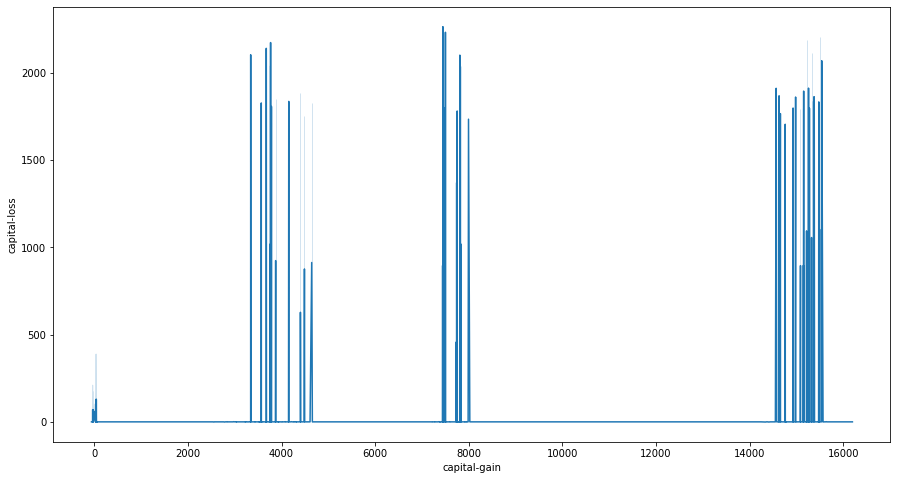

In [ ]:
_=plt.figure(figsize=(15,8))
sns.lineplot(x=train['capital-gain'],y=train['capital-loss']);

#### The above line plot explains that the capital loss is got peaked at three different capital gain ranges.

### Let's see employee native country information.

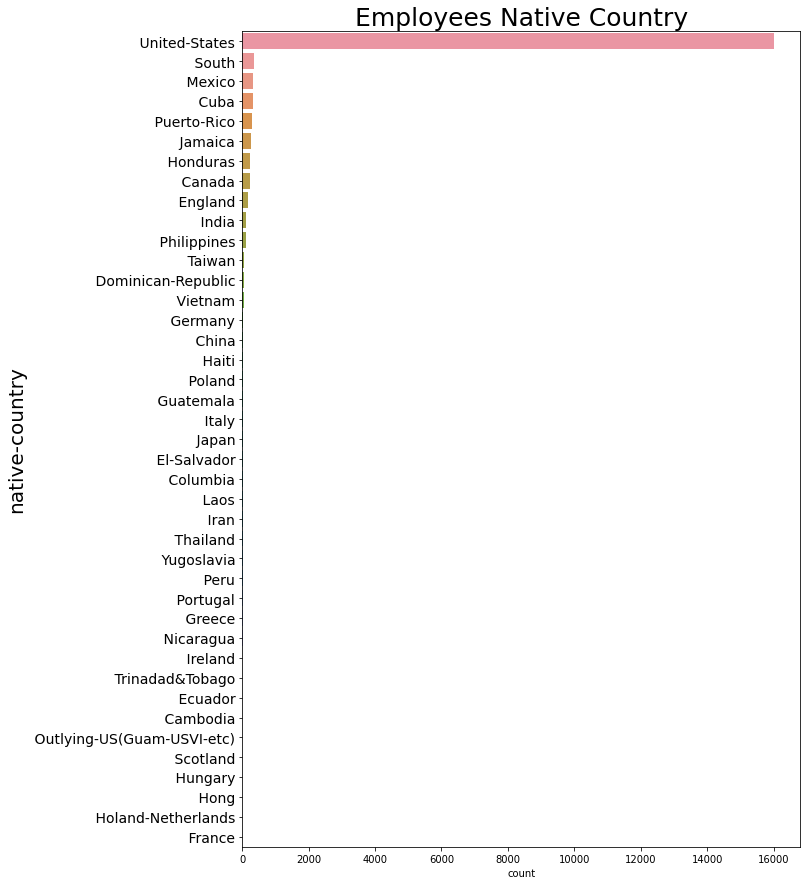

In [ ]:
plt.figure(figsize=(10,15))
_=sns.countplot(y=train['native-country'],order=train['native-country'].value_counts().index)
_=plt.title("Employees Native Country",fontsize=25)
_=plt.ylabel('native-country',fontsize=20)
_=plt.yticks(fontsize=14)


#### The above plot explains that the most employees native country is United-States.

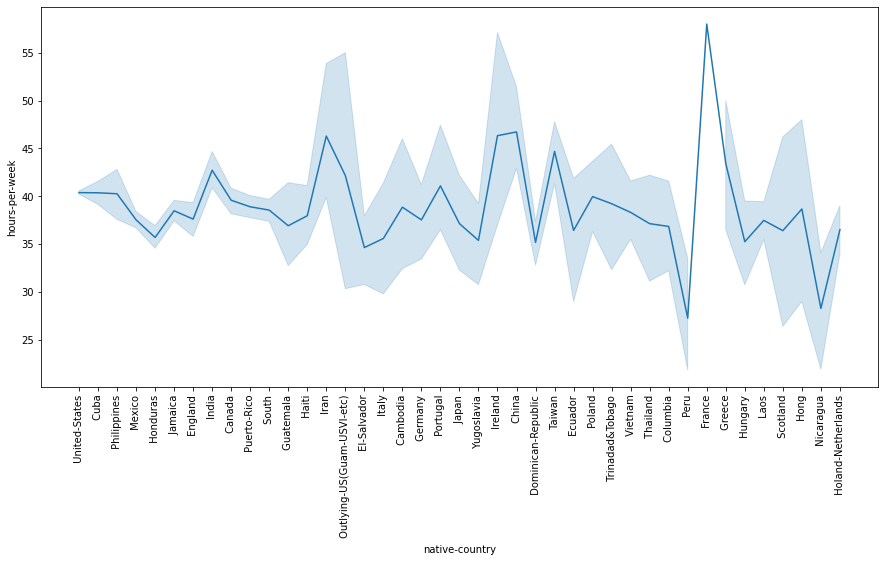

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(x=train['native-country'],y=train['hours-per-week'])
_=plt.xticks(fontsize=10,rotation=90)

#### The above line plot explains that the France native employees work hour per week is higher than the rest of the country employees.

#### Peru, Nicaragua country native employee's work hour per week is lower than the rest of countries.

### Let's see income categories of employees.

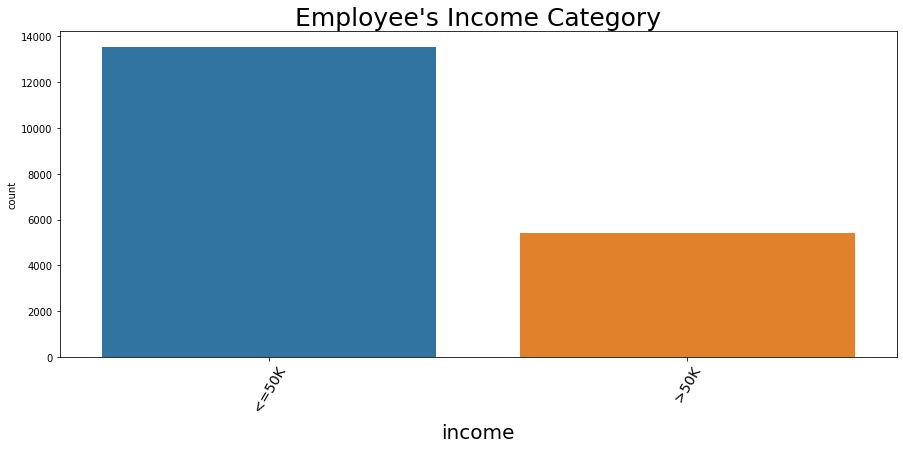

In [ ]:
cat_plot(train,'income',"Employee's Income Category")

#### Most of the employees income category is less than or equal to 50k.

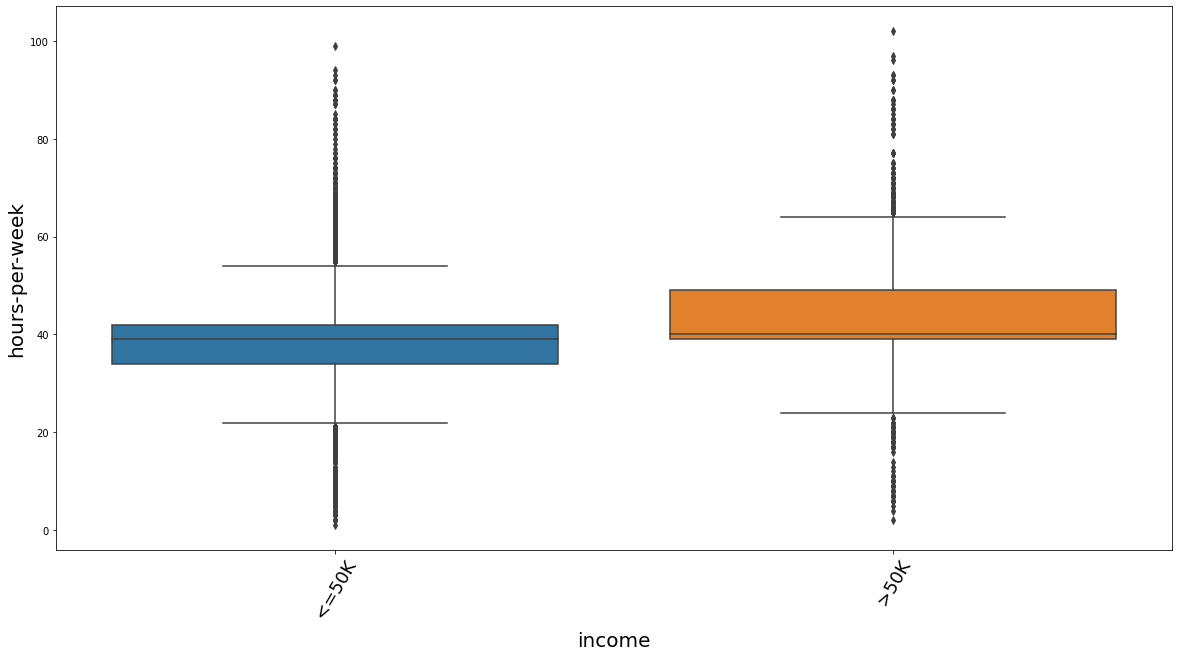

In [ ]:
cat_wise_box(train,'income','hours-per-week')

In [ ]:
group_summary(train,'income','hours-per-week')

,income,count,mean,std,min,25%,50%,75%,max
1,>50K,5427.0,44.327805,10.162319,2.0,39.0,40.0,49.0,102.0
0,<=50K,13517.0,38.429607,11.046440,1.0,34.0,39.0,42.0,99.0


#### The above boxplot explains that the employee who earns more than 50k and their work hour per week is more than 44 hours.

### Let's see is there any correlation between numerical variables.

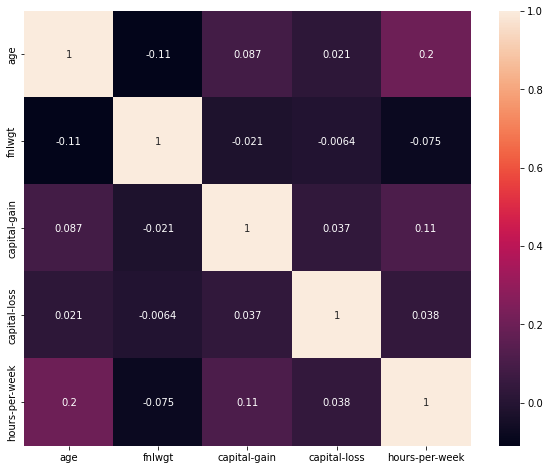

In [ ]:
_=plt.figure(figsize=(10,8))
sns.heatmap(train.iloc[:,np.r_[0,2,10,11,12]].corr(),annot=True)

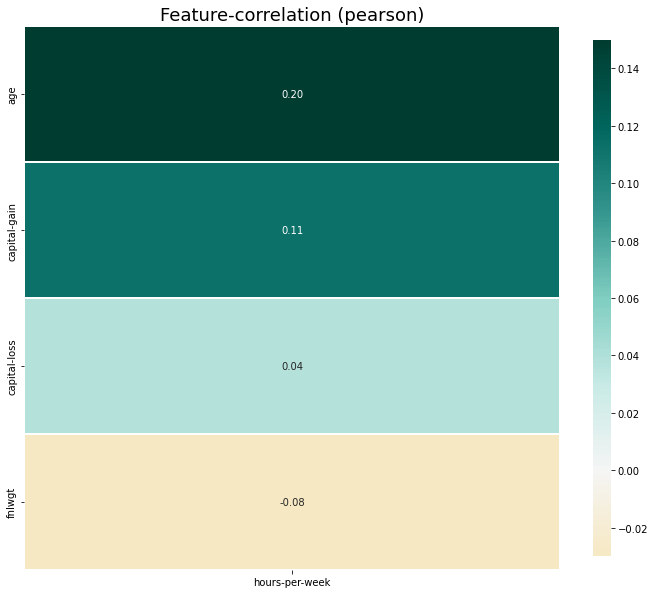

In [ ]:
klib.corr_plot(train.iloc[:,np.r_[0,2,10,11,12]], target='hours-per-week')

#### The above correlation plot explains that the target variable(hours-per-week) has positively correlated with a capital gain, capital loss, and age variable.